<a href="https://colab.research.google.com/github/thoufiqz55/Fraudulent_prediction/blob/main/job_real_fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [285]:
data.shape

(17880, 18)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [287]:
data=data.drop(['title'],axis=1)

In [288]:
data=data.drop(['job_id','location','department','company_profile',
                'description','requirements','benefits','industry','function'],axis=1)

In [289]:
data.shape

(17880, 8)

In [290]:
data.isnull().sum()

salary_range           15012
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
fraudulent                 0
dtype: int64

In [291]:
def impute_nan(data,variable,mode):
  data[variable+'_mode']=data[variable].fillna(mode)
  data[variable+'_random']=data[variable]
  random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
  random_sample.index=data[data[variable].isnull()].index
  data.loc[data[variable].isnull(),variable+'_random']=random_sample

In [292]:
mode=data.employment_type.mode()

In [293]:
impute_nan(data,'required_experience',mode)

In [294]:
impute_nan(data,'required_education',mode)

In [295]:
data.head()

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,required_experience_mode,required_experience_random,required_education_mode,required_education_random
0,NaN,0,1,0,Other,Internship,NaN,0,Internship,Internship,Full-time,High School or equivalent
1,NaN,0,1,0,Full-time,Not Applicable,NaN,0,Not Applicable,Not Applicable,NaN,Bachelor's Degree
2,NaN,0,1,0,NaN,NaN,NaN,0,NaN,Mid-Senior level,NaN,Bachelor's Degree
3,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,Mid-Senior level,Mid-Senior level,Bachelor's Degree,Bachelor's Degree
4,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,Mid-Senior level,Mid-Senior level,Bachelor's Degree,Bachelor's Degree


In [296]:
data.isnull().sum()

salary_range                  15012
telecommuting                     0
has_company_logo                  0
has_questions                     0
employment_type                3471
required_experience            7050
required_education             8105
fraudulent                        0
required_experience_mode       7050
required_experience_random        0
required_education_mode        8104
required_education_random         0
dtype: int64

In [298]:
data=data.drop(['salary_range','employment_type','required_experience','required_education'
,'required_experience_mode','required_education_mode'],axis=1)

In [299]:
categorical=data.select_dtypes('object').columns.tolist()
categorical

['required_experience_random', 'required_education_random']

In [300]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in categorical:
  data[i]=encoder.fit_transform(data[i])

In [301]:
data.shape

(17880, 6)

In [302]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [303]:
x=data.drop('fraudulent',axis=1)
y=data['fraudulent']

In [304]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [325]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
x_os,y_os=os.fit_resample(x_scaled,y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [326]:
from collections import Counter
print(Counter(y))
print(Counter(y_os))

Counter({0: 17014, 1: 866})
Counter({0: 17014, 1: 12760})


In [327]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_os,y_os,test_size=.20,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((23819, 5), (23819,), (5955, 5), (5955,))

In [328]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score

In [329]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=150,random_state=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

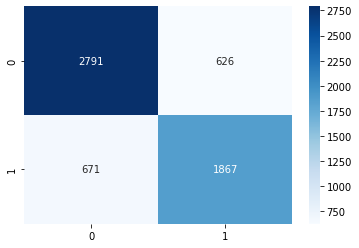

In [330]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='.0f')

In [331]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3417
           1       0.75      0.74      0.74      2538

    accuracy                           0.78      5955
   macro avg       0.78      0.78      0.78      5955
weighted avg       0.78      0.78      0.78      5955



In [332]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F! score :',f1_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score :',recall_score(y_test,y_pred))

Accuracy : 0.7821998320738874
F! score : 0.742198370105347
Precision Score : 0.748896911351785
Recall Score : 0.735618597320725


In [335]:
data=pd.DataFrame(y_test,columns= ['fraudulent'])

data['Predicted'] = y_pred
data.head()

,fraudulent,Predicted
21631,1,1
25452,1,1
27718,1,1
10843,0,0
7202,1,1


In [336]:
test=pd.DataFrame(x_test)
test.to_csv('test.csv')

In [337]:
train=pd.DataFrame(x_train)
train['fraudulent']=y_train
train.to_csv('trainf.csv')

In [342]:
ans1=pd.DataFrame(data)
ans1.to_csv('answer1.csv')